In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import TruncatedSVD
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
!pip install lightgbm

from lightgbm import LGBMRegressor

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 325.1 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.5 MB 409.6 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.5 MB 535.8 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.5 MB 702.7 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.5 MB 846.9 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.5 MB 930.9 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.5 MB 933.7 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.5 MB 933.7 kB/s eta 0:00:02
   ------------ --------------------------- 0.5/1.5 MB 1.0 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.5 MB 1.0 MB/s eta 0:00:01
   --------------

In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\archive (4)\Vehicle Price.csv")
train,test= train_test_split(df,test_size=0.2,random_state=42)
test.to_csv('test.csv', index=False)

In [3]:
train.dropna(subset=['price'], inplace=True)

In [4]:
train['year'] = train['year'].astype('object')

In [5]:
train.dtypes

name               object
description        object
make               object
model              object
year               object
price             float64
engine             object
cylinders         float64
fuel               object
mileage           float64
transmission       object
trim               object
body               object
doors             float64
exterior_color     object
interior_color     object
drivetrain         object
dtype: object

# Check if data is normal distribution or not

In [6]:
mean_val = train['mileage'].mean()
median_val = train['mileage'].median()
mode_val = train['mileage'].mode()[0]  # mode() returns a Series, take first mode

print(f"Mean of mileage: {mean_val}")
print(f"Median of mileage: {median_val}")
print(f"Mode of mileage: {mode_val}")

Mean of mileage: 39.4635761589404
Median of mileage: 8.0
Mode of mileage: 5.0


In [7]:
mean_val = train['doors'].mean()
median_val = train['doors'].median()
mode_val = train['doors'].mode()[0]  # mode() returns a Series, take first mode

print(f"Mean of doors: {mean_val}")
print(f"Median of doors: {median_val}")
print(f"Mode of doors: {mode_val}")

Mean of doors: 3.9392764857881137
Median of doors: 4.0
Mode of doors: 4.0


In [8]:
mean_val = train['cylinders'].mean()
median_val = train['cylinders'].median()
mode_val = train['cylinders'].mode()[0]  # mode() returns a Series, take first mode

print(f"Mean of cylinders: {mean_val}")
print(f"Median of cylinders: {median_val}")
print(f"Mode of cylinders: {mode_val}")

Mean of cylinders: 5.024531024531025
Median of cylinders: 4.0
Mode of cylinders: 4.0


# Draw box_plot to see if there is outliers or or not to decide how to deal with nulls

In [9]:
def visualize_box_plot(df,column):
    plt.figure(figsize=(7,6))
    sns.boxplot(y=df[column])
    plt.title(f"Box plot for {column} column")
    plt.show
    

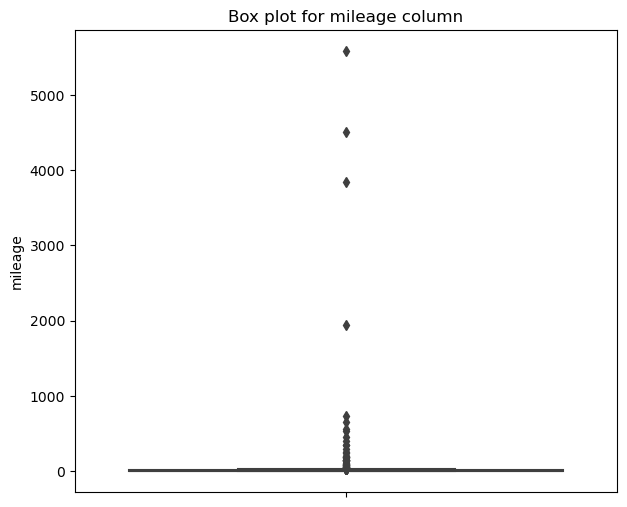

In [10]:
visualize_box_plot(train,'mileage')

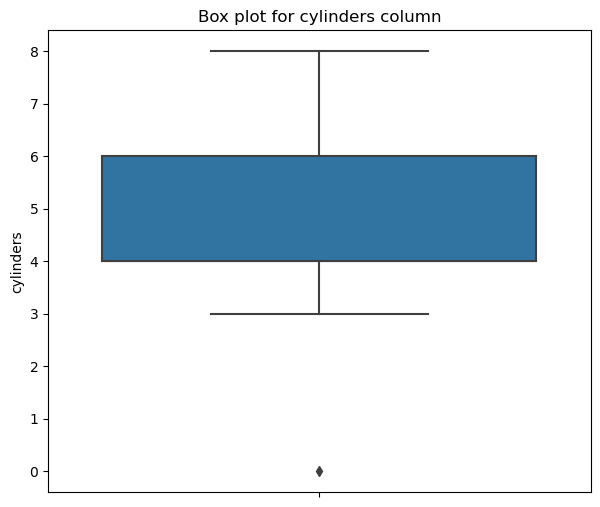

In [11]:
visualize_box_plot(train,'cylinders')

# Deal with nulls

In [12]:
train.isnull().sum()

name               0
description       44
make               0
model              0
year               0
price              0
engine             1
cylinders         87
fuel               7
mileage           25
transmission       1
trim               1
body               2
doors              6
exterior_color     4
interior_color    33
drivetrain         0
dtype: int64

In [13]:
import joblib
import pandas as pd

def nulls(df):
    imputers = {}
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            # Median for doors, mileage, cylinders
            if column in ['mileage', 'doors', 'cylinders']:
                median_value = df[column].median()
                imputers[column] = median_value
                df[column] = df[column].fillna(median_value)
            else:
                # Mean for other numeric columns
                mean_value = df[column].mean()
                imputers[column] = mean_value
                df[column] = df[column].fillna(mean_value)
        
        else:
            # For text columns
            if column == 'description':
                cleaned = df[column].astype(str).str.strip()
                cleaned = cleaned.replace(r'^\s*$', pd.NA, regex=True)
                cleaned = cleaned.replace('.', pd.NA)
                # Only consider valid strings for mode
                valid_text = cleaned.dropna()
                mode_series = valid_text.mode()
                mode_value = mode_series[0] if not mode_series.empty else ""
                imputers[column] = mode_value
                df[column] = df[column].fillna(mode_value)
            else:
                mode_series = df[column].dropna().mode()
                mode_value = mode_series[0] if not mode_series.empty else ""
                imputers[column] = mode_value
                df[column] = df[column].fillna(mode_value)
    
    return imputers

# Apply to train set
imputer_values = nulls(train)  
joblib.dump(imputer_values, 'imputer_values.pkl')  # Save dictionary
imputer_values


{'name': '2023 Dodge Durango Pursuit',
 'description': 'nan',
 'make': 'Jeep',
 'model': 'Hornet',
 'year': 2024,
 'price': 50729.68974358974,
 'engine': '16V GDI DOHC Turbo',
 'cylinders': 4.0,
 'fuel': 'Gasoline',
 'mileage': 8.0,
 'transmission': '8-Speed Automatic',
 'trim': 'Limited',
 'body': 'SUV',
 'doors': 4.0,
 'exterior_color': 'Bright White Clearcoat',
 'interior_color': 'Black',
 'drivetrain': 'All-wheel Drive'}

In [14]:
train.isnull().sum()

name              0
description       0
make              0
model             0
year              0
price             0
engine            0
cylinders         0
fuel              0
mileage           0
transmission      0
trim              0
body              0
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64

# Deal with outliers

In [15]:
import joblib

def deal_with_outliers(df, column, op):
    Q1 = df[column].quantile(0.25)
    Q2 = df[column].quantile(0.50)  # median
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    if op == 'median':
        df[column] = df[column].apply(lambda x: Q2 if x < lower_bound or x > upper_bound else x)
    else:
        mean_val = df[column].mean()
        df[column] = df[column].apply(lambda x: mean_val if x < lower_bound or x > upper_bound else x)
    
    unique_outlier_values_after_deal_with = df.loc[df[column] > upper_bound, column].unique()
    print(f'Median is {Q2}')
    
    # Save the bounds and median to a dictionary
    stats = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'median': Q2
    }
    
    # Save this dictionary to a file with joblib
    joblib.dump(stats, f'{column}_outlier_stats.pkl')
    
    return stats


Median is 8.0


{'lower_bound': -8.0, 'upper_bound': 24.0, 'median': 8.0}

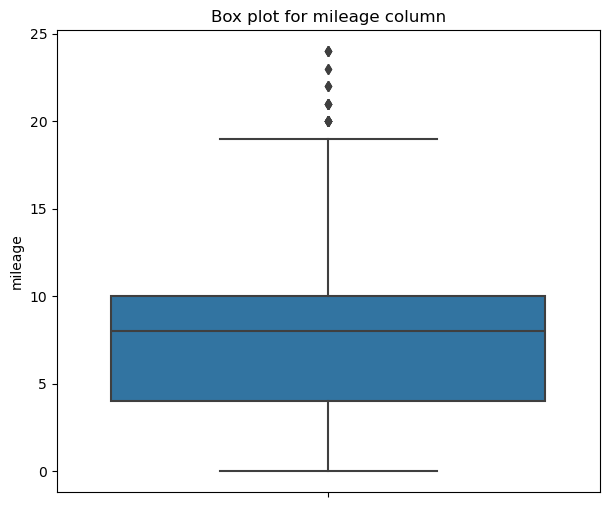

In [16]:
s=deal_with_outliers(train,'mileage','median')
visualize_box_plot(train,'mileage')
s

Median is 4.0


{'lower_bound': 1.0, 'upper_bound': 9.0, 'median': 4.0}

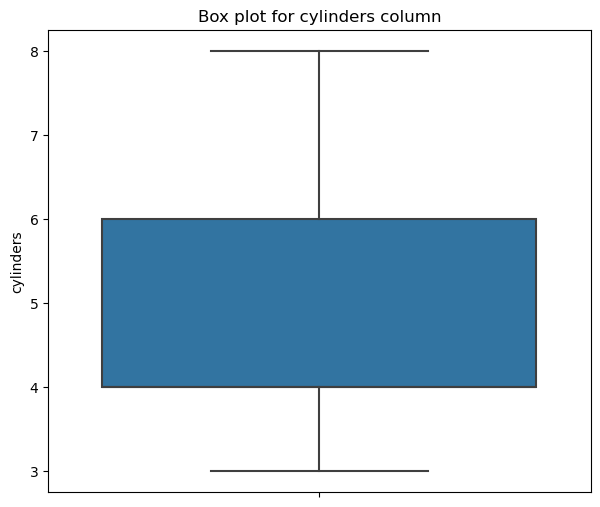

In [17]:
d=deal_with_outliers(train,'cylinders','mean')
visualize_box_plot(train,'cylinders')
d

In [18]:
train

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
535,2023 Jeep Grand Cherokee Laredo,\n \n EquipmentKeep your hands war...,Jeep,Grand Cherokee,2023,43000.0,"ar 3.6L V-6 DOHC, variable valve control, regu...",6.0,Gasoline,16.0,8-speed automatic,Laredo,SUV,4.0,Silver Zynith,Global Black,Four-wheel Drive
697,2024 Mercedes-Benz GLS 450 4MATIC,\n \n Recent Arrival! Doggett Merc...,Mercedes-Benz,GLS 450,2024,95230.0,24V GDI DOHC Turbo,6.0,Gasoline,8.0,9-Speed Automatic,4MATIC,SUV,4.0,Polar White,Macchiato Beige,All-wheel Drive
557,2024 Jeep Grand Cherokee 4xe Trailhawk,"\n \n 2.0L I4 DOHC, 4WD. Diamond B...",Jeep,Grand Cherokee 4xe,2024,67784.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,8.0,8-Speed Automatic,Trailhawk,SUV,4.0,Diamond Black,Global Black,Four-wheel Drive
644,2024 Jeep Grand Cherokee L Altitude,\n \n Bright White Clearcoat 2024 ...,Jeep,Grand Cherokee L,2024,47451.0,"ar 3.6L V-6 DOHC, variable valve control, regu...",6.0,Gasoline,3.0,Automatic,Altitude,SUV,4.0,Bright White Clearcoat,Global Black,Four-wheel Drive
598,2023 Hyundai IONIQ 6 SEL,nan,Hyundai,IONIQ 6,2023,39997.0,c,4.0,Electric,8.0,1-Speed Automatic,SEL,Sedan,4.0,Onyx Black,Black,All-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2024 Chevrolet Silverado 1500 RST,"\n \n 10-Speed Automatic, 4WD, Bla...",Chevrolet,Silverado 1500,2024,54559.0,16V GDI OHV,8.0,Gasoline,8.0,Automatic,RST,Pickup Truck,4.0,Sterling Gray Metallic,Jet Black,Four-wheel Drive
270,2024 Ford Escape Active,Doing business with Maguire means you'll alway...,Ford,Escape,2024,34799.0,12V PDI DOHC Turbo,3.0,Gasoline,3.0,8-Speed Automatic,Active,SUV,4.0,Carbonized Gray Metallic,Ebony,All-wheel Drive
860,2024 Ford Expedition King Ranch,"\n \n Heated Leather Seats, Naviga...",Ford,Expedition,2024,86490.0,24V PDI DOHC Twin Turbo,6.0,Gasoline,6.0,10-Speed Automatic,King Ranch,SUV,4.0,Black,Java,Four-wheel Drive
435,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,19.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive


In [19]:
categorical_cols = train.select_dtypes(include=['object']).columns

# Print each column name with number of unique values
for col in categorical_cols:
    print(f"{col}: {train[col].nunique()} unique values")

name: 319 unique values
description: 611 unique values
make: 28 unique values
model: 141 unique values
engine: 98 unique values
fuel: 7 unique values
transmission: 34 unique values
trim: 180 unique values
body: 7 unique values
exterior_color: 234 unique values
interior_color: 77 unique values
drivetrain: 4 unique values


# Feature Engineering

In [20]:
train.drop(columns=['name'], inplace=True)## as all parts are found akready in seperate columns

In [21]:
train['interior_color'].value_counts()

interior_color
Black               429
Global Black         66
Gray                 61
Jet Black            37
Ebony                29
                   ... 
Ebony Black           1
Volcano Brown         1
Medium Sandstone      1
Dark Palazzo          1
Java                  1
Name: count, Length: 77, dtype: int64

In [22]:
# Select categorical (object) columns
categorical_cols = train.select_dtypes(include=['object']).columns

# Print each column name with number of unique values
for col in categorical_cols:
    print(f"{col}: {train[col].nunique()} unique values")

description: 611 unique values
make: 28 unique values
model: 141 unique values
engine: 98 unique values
fuel: 7 unique values
transmission: 34 unique values
trim: 180 unique values
body: 7 unique values
exterior_color: 234 unique values
interior_color: 77 unique values
drivetrain: 4 unique values


In [23]:
def interior_colors(color):
    color = str(color).lower()  # make case-insensitive
    if 'black' in color:
        return 'Black'
    elif 'brown' in color:
        return 'Brown'
    elif 'gray' in color or 'grey' in color:
        return 'Gray'
    elif 'sandstone' in color:
        return 'Sandstone'
    elif 'java' in color:
        return 'Java'
    elif 'palazzo' in color:
        return 'Palazzo'
    elif 'volcano' in color:
        return 'Volcano'
    elif 'ebony' in color:
        return 'Ebony'
    elif 'red' in color:
        return 'Red'
    elif 'dark' in color:
        return 'Dark'
    elif 'blue' in color:
        return 'Blue'
    elif 'premium' in color:
        return 'Premium'
    else:
        return color.title()  # capitalize other colors nicely

train['interior_color'] = train['interior_color'].apply(interior_colors)

In [24]:
# Select categorical (object) columns
categorical_cols = train.select_dtypes(include=['object']).columns

# Print each column name with number of unique values
for col in categorical_cols:
    print(f"{col}: {train[col].nunique()} unique values")

description: 611 unique values
make: 28 unique values
model: 141 unique values
engine: 98 unique values
fuel: 7 unique values
transmission: 34 unique values
trim: 180 unique values
body: 7 unique values
exterior_color: 234 unique values
interior_color: 37 unique values
drivetrain: 4 unique values


In [25]:
def exterior_colors(color):
    color = str(color).lower()  # make case-insensitive
    if 'black' in color:
        return 'Black'
    elif 'brown' in color:
        return 'Brown'
    elif 'gray' in color or 'grey' in color:
        return 'Gray'
    elif 'sandstone' in color:
        return 'Sandstone'
    elif 'java' in color:
        return 'Java'
    elif 'palazzo' in color:
        return 'Palazzo'
    elif 'volcano' in color:
        return 'Volcano'
    elif 'ebony' in color:
        return 'Ebony'
    elif 'red' in color:
        return 'Red'
    elif 'dark' in color:
        return 'Dark'
    elif 'blue' in color:
        return 'Blue'
    elif 'premium' in color:
        return 'Premium'
    elif 'white' in color:
        return 'White'
    elif 'silver' in color:
        return 'Silver'
    elif 'yellow' in color:
        return 'Yellow'
    elif 'bronze' in color:
        return 'Bronze'
    elif 'green' in color:
        return 'Green'
    elif 'metallic' in color:
        return 'Metallic'
    else:
        return color.title()  # capitalize other colors nicely

train['exterior_color'] = train['exterior_color'].apply(exterior_colors)

In [26]:
def model(model):
    model = str(model).lower()  # make case-insensitive
    if 'grand cherokee' in model:
        return 'Grand Cherokee'
    elif 'wagoneer' in model:
        return 'Wagoneer'
    elif 'wrangler' in model:
        return 'Wrangler'
    else:
        return model.title()  # capitalize other models nicely

train['model'] = train['model'].apply(model)

In [27]:
def engine(engine):
    
    engine = str(engine).lower()  # make case-insensitive
    if 'turbo' in engine:
        return 'Turbo'
    elif 'sohc' in engine:
        return 'SOHC'
    elif 'dohc' in engine:
        return 'DOHC'
    elif 'ohv' in engine:
        return 'Ohv'
    else:
        return engine.title()  # capitalize other models nicely

train['engine'] = train['engine'].apply(engine)

In [28]:
def transmission_type(trans):
    trans = str(trans).lower().strip()

    if 'battery' in trans or 'kwh' in trans:
        return 'Automatic'
    if 'cvt' in trans or 'variable' in trans:
        return 'CVT'
    elif 'dual clutch' in trans:
        return 'Dual-Clutch'
    elif 'manual' in trans:
        return 'Manual'
    elif 'automatic' in trans or 'a/t' in trans or 'auto trans' in trans:
        return 'Automatic'    
    else:
        return trans.title()  # keep other types capitalized

train['transmission'] = train['transmission'].apply(transmission_type)


In [29]:
col = 'engine'

mode_value = train[col].mode()[0]
value_counts = train[col].value_counts()

train[col] = train[col].apply(lambda x: mode_value if (value_counts[x] <= 5 or x == "C") else x)


In [30]:
# Select categorical (object) columns
categorical_cols = train.select_dtypes(include=['object']).columns

# Print each column name with number of unique values
for col in categorical_cols:
    print(f"{col}: {train[col].nunique()} unique values")

description: 611 unique values
make: 28 unique values
model: 136 unique values
engine: 4 unique values
fuel: 7 unique values
transmission: 3 unique values
trim: 180 unique values
body: 7 unique values
exterior_color: 56 unique values
interior_color: 37 unique values
drivetrain: 4 unique values


In [31]:
train= train.drop(columns='description')

# Encoding

In [32]:
import joblib
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd

low_card_cat_features = ['engine', 'fuel', 'transmission', 'body', 'drivetrain']
med_high_card_cat_features = ['make', 'model', 'trim', 'exterior_color', 'interior_color']

# 1. Frequency encoding: directly compute and map frequency counts inline
freq_mappings = {}
for col in med_high_card_cat_features:
    freq = train[col].value_counts()
    freq_mappings[col] = freq
    train[col] = train[col].map(freq)

# Save freq_mappings dict
joblib.dump(freq_mappings, 'freq_mappings.pkl')

# 2. One-hot encoder: fit and save
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(train[low_card_cat_features])
low_card_encoded = pd.DataFrame(
    ohe.transform(train[low_card_cat_features]),
    columns=ohe.get_feature_names_out(low_card_cat_features),
    index=train.index
)

# Save fitted OneHotEncoder
joblib.dump(ohe, 'onehot_encoder.pkl')


train = pd.concat([train.drop(columns=low_card_cat_features), low_card_encoded], axis=1)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [33]:
train.columns

Index(['make', 'model', 'year', 'price', 'cylinders', 'mileage', 'trim',
       'doors', 'exterior_color', 'interior_color', 'engine_DOHC',
       'engine_Ohv', 'engine_SOHC', 'engine_Turbo', 'fuel_Diesel',
       'fuel_Diesel (B20 capable)', 'fuel_E85 Flex Fuel', 'fuel_Electric',
       'fuel_Gasoline', 'fuel_Hybrid', 'fuel_PHEV Hybrid Fuel',
       'transmission_Automatic', 'transmission_CVT',
       'transmission_Dual-Clutch', 'body_Cargo Van', 'body_Hatchback',
       'body_Minivan', 'body_Passenger Van', 'body_Pickup Truck', 'body_SUV',
       'body_Sedan', 'drivetrain_All-wheel Drive',
       'drivetrain_Four-wheel Drive', 'drivetrain_Front-wheel Drive',
       'drivetrain_Rear-wheel Drive'],
      dtype='object')

In [34]:

scaler = StandardScaler()

# Specify columns to exclude (year and target)
exclude_cols = ['year', 'price']  # replace 'target_column' with your target name

# Select columns to scale
cols_to_scale = train.columns.difference(exclude_cols)

# Scale only those columns
train[cols_to_scale] = scaler.fit_transform(train[cols_to_scale])
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [35]:
train

,make,model,year,price,cylinders,mileage,trim,doors,exterior_color,interior_color,...,body_Hatchback,body_Minivan,body_Passenger Van,body_Pickup Truck,body_SUV,body_Sedan,drivetrain_All-wheel Drive,drivetrain_Four-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive
535,1.714042,2.344019,2023,43000.0,0.805956,1.669604,0.094840,0.213436,-0.628473,0.583743,...,-0.095161,-0.035829,-0.125,-0.432683,0.654654,-0.286061,-0.909229,1.414214,-0.409469,-0.275431
697,-1.067144,-1.008088,2024,95230.0,0.805956,0.105290,-0.613981,0.213436,1.371438,-1.874008,...,-0.095161,-0.035829,-0.125,-0.432683,0.654654,-0.286061,1.099833,-0.707107,-0.409469,-0.275431
557,1.714042,2.344019,2024,67784.0,-0.681805,0.105290,-0.356228,0.213436,0.345843,0.583743,...,-0.095161,-0.035829,-0.125,-0.432683,0.654654,-0.286061,-0.909229,1.414214,-0.409469,-0.275431
644,1.714042,2.344019,2024,47451.0,0.805956,-0.872406,-0.485104,0.213436,1.371438,0.583743,...,-0.095161,-0.035829,-0.125,-0.432683,0.654654,-0.286061,-0.909229,1.414214,-0.409469,-0.275431
598,0.420467,-0.795256,2023,39997.0,-0.681805,0.105290,0.545907,0.213436,0.345843,0.583743,...,-0.095161,-0.035829,-0.125,-0.432683,-1.527525,3.495760,1.099833,-0.707107,-0.409469,-0.275431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.614393,0.109281,2024,54559.0,2.293716,0.105290,-0.742857,0.213436,-0.205415,0.583743,...,-0.095161,-0.035829,-0.125,2.311161,-1.527525,-0.286061,-0.909229,1.414214,-0.409469,-0.275431
270,-0.010725,-0.582423,2024,34799.0,-1.425685,-0.872406,-0.613981,0.213436,-0.205415,-1.746883,...,-0.095161,-0.035829,-0.125,-0.432683,0.654654,-0.286061,1.099833,-0.707107,-0.409469,-0.275431
860,-0.010725,-0.688839,2024,86490.0,0.805956,-0.285788,-0.871734,0.213436,0.345843,-1.874008,...,-0.095161,-0.035829,-0.125,-0.432683,0.654654,-0.286061,-0.909229,1.414214,-0.409469,-0.275431
435,0.312669,0.375321,2023,46835.0,2.293716,2.256222,0.739222,0.213436,1.371438,0.583743,...,-0.095161,-0.035829,-0.125,-0.432683,0.654654,-0.286061,1.099833,-0.707107,-0.409469,-0.275431


In [36]:
X = train.drop(columns='price')
y = train['price']

# 2. Feature selection
selector = SelectKBest(score_func=mutual_info_regression, k=15)  # choose top features
X_selected = selector.fit_transform(X, y)

# Optional: get selected column names
selected_columns = X.columns[selector.get_support()]
print("Selected features:", list(selected_columns))

Selected features: ['make', 'model', 'cylinders', 'mileage', 'trim', 'exterior_color', 'interior_color', 'engine_DOHC', 'engine_Ohv', 'engine_Turbo', 'fuel_Diesel', 'fuel_Gasoline', 'drivetrain_All-wheel Drive', 'drivetrain_Four-wheel Drive', 'drivetrain_Front-wheel Drive']


# polynomial regression

In [37]:



poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_selected)
with open('poly.pkl', 'wb') as f:
    pickle.dump(poly, f)
# 4. Train polynomial regression (CPU)
model = LinearRegression()
model.fit(X_poly, y)

# 5. Predict on training data
y_pred = model.predict(X_poly)

# 6. Evaluate metrics
mean_target = y.mean()
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)

# Percentage errors
mse_pct = (mse / (mean_target ** 2)) * 100
rmse_pct = (rmse / mean_target) * 100
mae_pct = (mae / mean_target) * 100

print(f"R² Score: {r2:.4f}")
print(f"MSE (% of mean^2): {mse_pct:.2f}%")
print(f"RMSE (% of mean): {rmse_pct:.2f}%")
print(f"MAE (% of mean): {mae_pct:.2f}%")
with open('poly_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

R² Score: 0.6745
MSE (% of mean^2): 4.70%
RMSE (% of mean): 21.67%
MAE (% of mean): 14.13%


# Tress

In [38]:


# 3. Define Decision Tree and parameter grid
dt = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [7,8,9,10, None],
    'min_samples_split': [2,3,4, 5],
    'min_samples_leaf': [1, 2,3,4,5]
}

# 4. Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='r2',       # optimize R² score
    n_jobs=-1           # use all CPU cores
)

# Fit GridSearch
grid_search.fit(X_selected, y)

# Get the best model
best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# 5. Predict using best model
y_pred = best_model.predict(X_selected)

# 6. Evaluate metrics
mean_target = y.mean()
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)

# Percentage errors
mse_pct = (mse / (mean_target ** 2)) * 100
rmse_pct = (rmse / mean_target) * 100
mae_pct = (mae / mean_target) * 100

print(f"R² Score: {r2:.4f}")
print(f"MSE (% of mean^2): {mse_pct:.2f}%")
print(f"RMSE (% of mean): {rmse_pct:.2f}%")
print(f"MAE (% of mean): {mae_pct:.2f}%")

# 7. Save the best model
with open('tree_regression_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
R² Score: 0.8589
MSE (% of mean^2): 2.04%
RMSE (% of mean): 14.27%
MAE (% of mean): 8.22%


In [39]:
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50,100, 200,250,300,350,400],            # number of trees
    'max_depth': [5, 7, None],             # max depth of each tree
    'min_samples_split': [2,3,4, 5],           # min samples to split a node
    'min_samples_leaf': [1, 2,3,4,5]             # min samples at a leaf node
}

# 4. Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='r2',       # optimize for R²
    n_jobs=-1           # use all CPU cores
)

# Fit GridSearch
grid_search.fit(X_selected, y)

# Get the best model
best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# 5. Predict using best model
y_pred = best_model.predict(X_selected)

# 6. Evaluate metrics
mean_target = y.mean()
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)

# Percentage errors
mse_pct = (mse / (mean_target ** 2)) * 100
rmse_pct = (rmse / mean_target) * 100
mae_pct = (mae / mean_target) * 100

print(f"R² Score: {r2:.4f}")
print(f"MSE (% of mean^2): {mse_pct:.2f}%")
print(f"RMSE (% of mean): {rmse_pct:.2f}%")
print(f"MAE (% of mean): {mae_pct:.2f}%")

# 7. Save the best model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}
R² Score: 0.9171
MSE (% of mean^2): 1.20%
RMSE (% of mean): 10.94%
MAE (% of mean): 5.58%


In [40]:



# 1. Initialize Gradient Boosting model
gb = GradientBoostingRegressor(random_state=42)

# 2. Define parameter grid
param_grid = {
    'n_estimators': [100,200],     # number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1], # shrinkage factor
    'max_depth': [3,4,5],              # depth of individual trees
    'min_samples_split': [2,3,4, 5],         # min samples to split
    'min_samples_leaf': [1, 2,3,4]           # min samples at a leaf
}

# 3. Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='r2',       # optimize for R²
    n_jobs=-1
)

# 4. Fit GridSearch
grid_search.fit(X_selected, y)

# 5. Get the best model
best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# 6. Predict
y_pred = best_model.predict(X_selected)

# 7. Evaluate metrics
mean_target = y.mean()
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)

# Percentage errors
mse_pct = (mse / (mean_target ** 2)) * 100
rmse_pct = (rmse / mean_target) * 100
mae_pct = (mae / mean_target) * 100

print(f"R² Score: {r2:.4f}")
print(f"MSE (% of mean^2): {mse_pct:.2f}%")
print(f"RMSE (% of mean): {rmse_pct:.2f}%")
print(f"MAE (% of mean): {mae_pct:.2f}%")

# 8. Save the best model
with open('gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}
R² Score: 0.9723
MSE (% of mean^2): 0.40%
RMSE (% of mean): 6.32%
MAE (% of mean): 4.62%


In [41]:
selected_cols_df = pd.DataFrame(selected_columns, columns=['Selected_Features'])

# Save to CSV
selected_cols_df.to_csv('selected_features.csv', index=False)